### Making newral networking using Pytorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from torch.utils.data import DataLoader

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.2, 2.0, 5.0,
                   6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

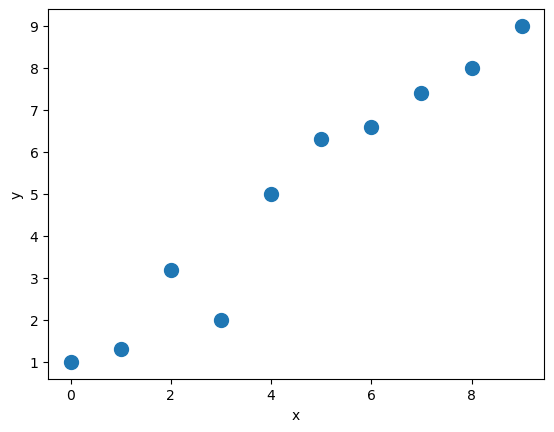

In [3]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [5]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [6]:
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [7]:
lr = 0.0001
num_epochs = 200
log_epochs = 10

In [8]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * lr
        bias -= bias.grad * lr
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch{epoch} loss {loss.item():.4f}')
        

Epoch0 loss 41.2725
Epoch10 loss 33.4404
Epoch20 loss 2.9381
Epoch30 loss 45.8447
Epoch40 loss 54.0369
Epoch50 loss 33.6368
Epoch60 loss 3.4260
Epoch70 loss 47.9207
Epoch80 loss 19.8630
Epoch90 loss 3.1201
Epoch100 loss 42.4967
Epoch110 loss 17.9425
Epoch120 loss 1.7065
Epoch130 loss 8.2857
Epoch140 loss 36.2075
Epoch150 loss 1.8874
Epoch160 loss 27.0822
Epoch170 loss 20.5449
Epoch180 loss 19.7151
Epoch190 loss 29.6383


In [9]:
print('Final parameters:', weight.item(), bias.item())

Final parameters: 1.327665090560913 1.5837528705596924


In [10]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)

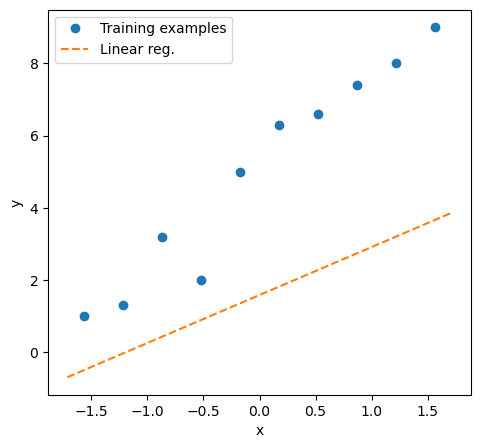

In [11]:
X_test_norm = (X_test - np.mean(X_test))/np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()
fig = plt.figure(figsize=(12,5))
ax= fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o')
plt.plot(X_test_norm, y_pred, '--')
plt.legend(['Training examples', 'Linear reg.'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both')
plt.show()

### I prefer to see the plot with orginal data set, not normalized ones

### Hire I will use torch.nn and torch.optim modules

In [12]:
import torch.nn as nn
input_size = 1
output_size =1
model = nn.Linear(input_size, output_size)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [13]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
    # with torch.no_grad():
    #     weight -= weight.grad * lr
    #     bias -= bias.grad * lr
    #     weight.grad.zero_()
    #     bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch{epoch} loss {loss.item():.4f}')

Epoch0 loss 24.6661
Epoch10 loss 29.1196
Epoch20 loss 20.8940
Epoch30 loss 0.1181
Epoch40 loss 12.4825
Epoch50 loss 2.0304
Epoch60 loss 7.6568
Epoch70 loss 2.5327
Epoch80 loss 0.0201
Epoch90 loss 0.9108
Epoch100 loss 0.8422
Epoch110 loss 0.4931
Epoch120 loss 0.0703
Epoch130 loss 0.0906
Epoch140 loss 0.1011
Epoch150 loss 0.1100
Epoch160 loss 0.1175
Epoch170 loss 0.1240
Epoch180 loss 0.0009
Epoch190 loss 0.0640


In [14]:
print('Final parameters:', weight.item(), bias.item())

Final parameters: 1.327665090560913 1.5837528705596924


### Iris sorting using multilayer perceptron

In [15]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [18]:
X = iris['data']
y = iris['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [20]:
X_train_norm = (X_train-np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)